In [14]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [15]:
#........fashion_mnist = tf.keras.datasets.fashion_mnist  # load dataset

#......(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

hand_written = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = hand_written.load_data()

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
test_images.shape

(10000, 28, 28)

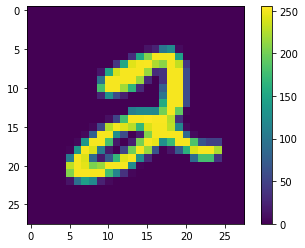

In [18]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', ' 9']

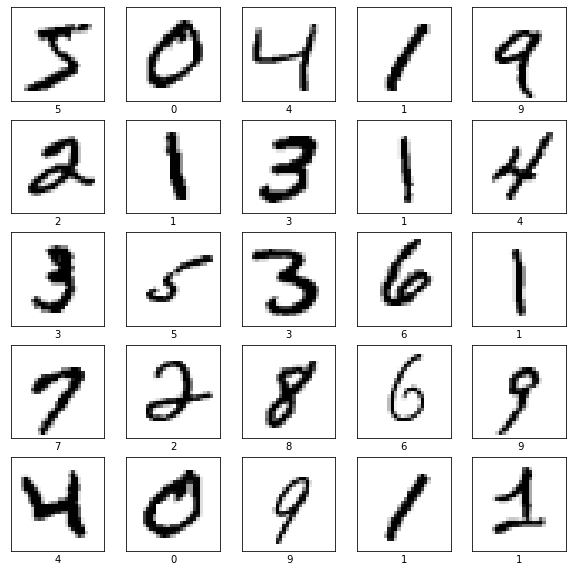

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128125, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 47s 23ms/step - loss: 0.2141 - accuracy: 0.9391
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1007 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0727 - accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0627 - accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0525 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0470 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0398 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0477 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0371 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 44s 23m

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1416 - accuracy: 0.9810
Test accuracy: 0.9810000061988831


In [26]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([4.2611353e-22, 4.5776180e-16, 1.7105345e-19, 2.6808852e-11,
       6.6701818e-24, 2.9933651e-21, 6.7728450e-24, 1.0000000e+00,
       7.1436760e-17, 3.8332935e-13], dtype=float32)

In [28]:
np.argmax(predictions[5])

1

In [29]:
test_labels[5]

1

Pick a number: 71


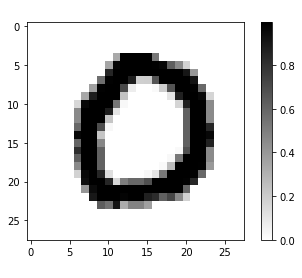

The value of image is 0


In [31]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', ' 9']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
pre=test_labels[num]
print('The value of image is', pre)
